## INSURANCE PREMIUM PREDICTION

**Life Cycle of Machine Learning Project**
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

**1) Problem Statement**
- This project understands how the persons insurance premium is affected by other variables such as Age, Sex, BMI, Children, Smoker and Region.


**2) Data Collection**
- Dataset Source : https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction
- The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns).

**2.1) Importing data and required packages**

importing pandas, numpy, seaborn, matplotlib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

Import the CSV Data as Pandas DataFrame

In [2]:
url = 'https://raw.githubusercontent.com/nikhil-xyz/datasets/main/insurance.csv'
df = pd.read_csv(url)

**Show top 5 records**

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


**Shape of Dataset**

In [4]:
df.shape

(1338, 7)

**2.2) Dataset Information**
- age : age of a person
- sex : gender of a person
- bmi : body mass index
- children : how many children the person have
- smoker : is the person smoker
- region : location where the person lives
- expenses : amount of premium to charge from the person (dependant feature)

**3) Data Checks to perform**
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

3.1) Check Missing values

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

3.2) Check duplicate

In [6]:
df.duplicated().sum()

1

There is one duplicate present inside this dataset. and since it is only one, we will drop it.

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

3.3) Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


3.4) Number of unique values in each column

In [10]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

3.5) Statistics of a data

In [11]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


**Insight**
- All candidate's age ranges between 18 and 64.
- some candidates don't have any kids but some of them have upto 5 kids. 


3.6) Categories inside the categorical data

In [12]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable:     ",end=" " )
print(df['smoker'].unique())

print("Categories in 'region' variable:     ",end=" " )
print(df['region'].unique())


Categories in 'sex' variable:      ['female' 'male']
Categories in 'smoker' variable:      ['yes' 'no']
Categories in 'region' variable:      ['southwest' 'southeast' 'northwest' 'northeast']


**4) Exploring Data (Visualization)**

4.1) Histogram and KDE

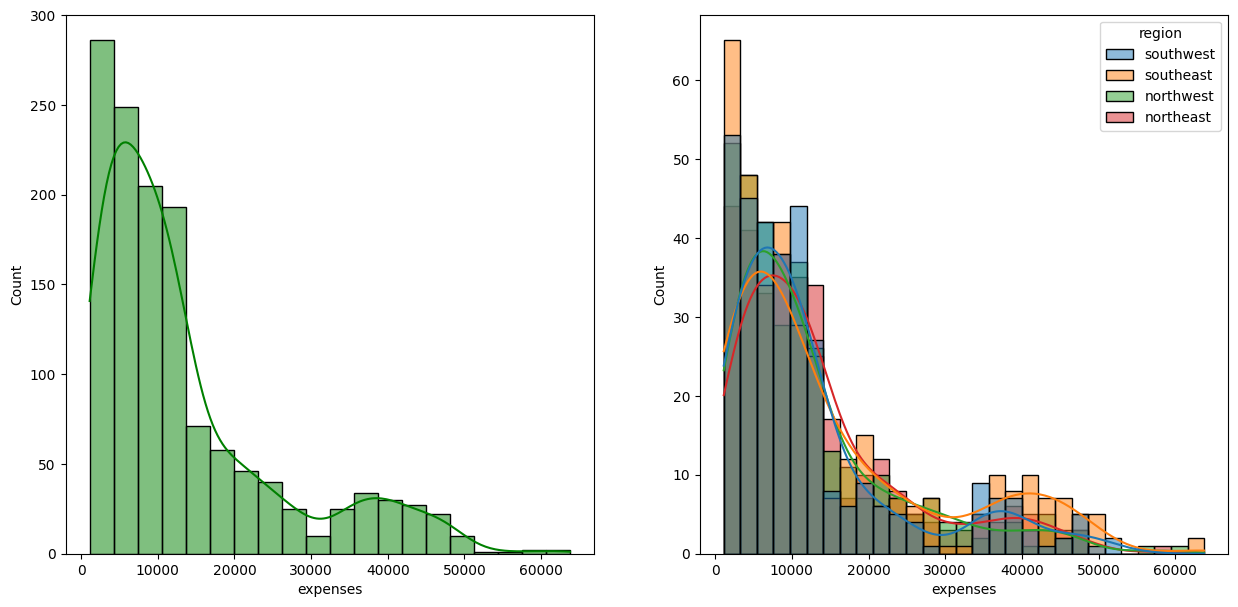

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='expenses', bins=20, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='expenses', kde=True, hue='region')
plt.show()

**Insights**
- South Eastern candidates tends to have camparitivaly higher expense

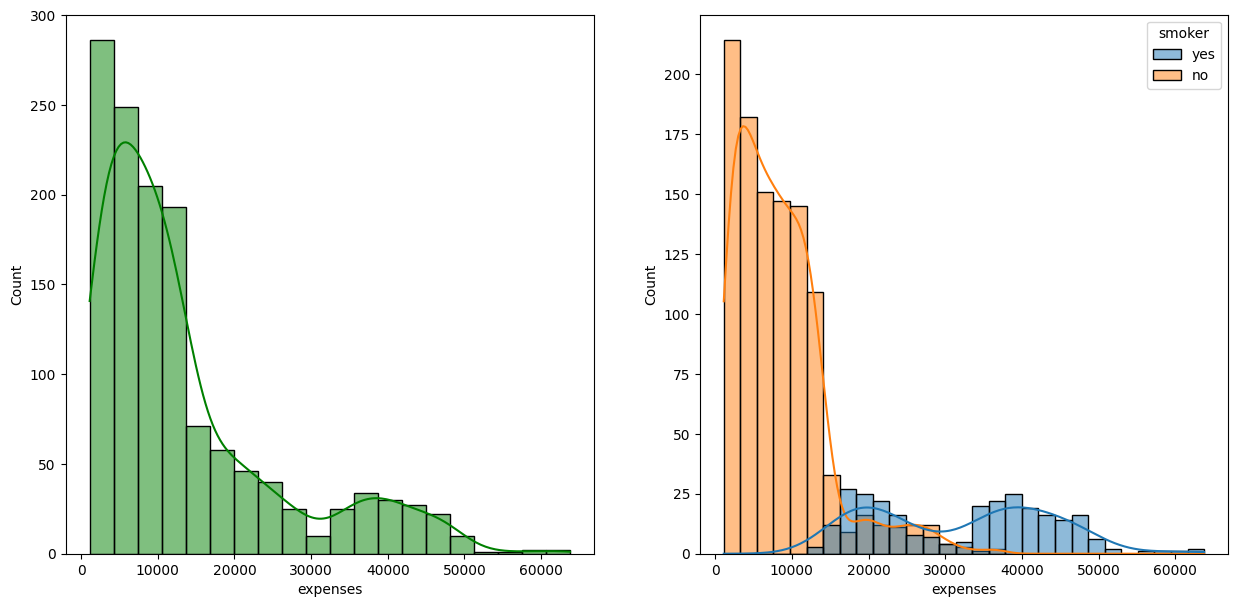

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='expenses', bins=20, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='expenses', kde=True, hue='smoker')
plt.show()

**Insights**
- Candidates with smoking habit relatively have more medical spending than non-smoking candidate

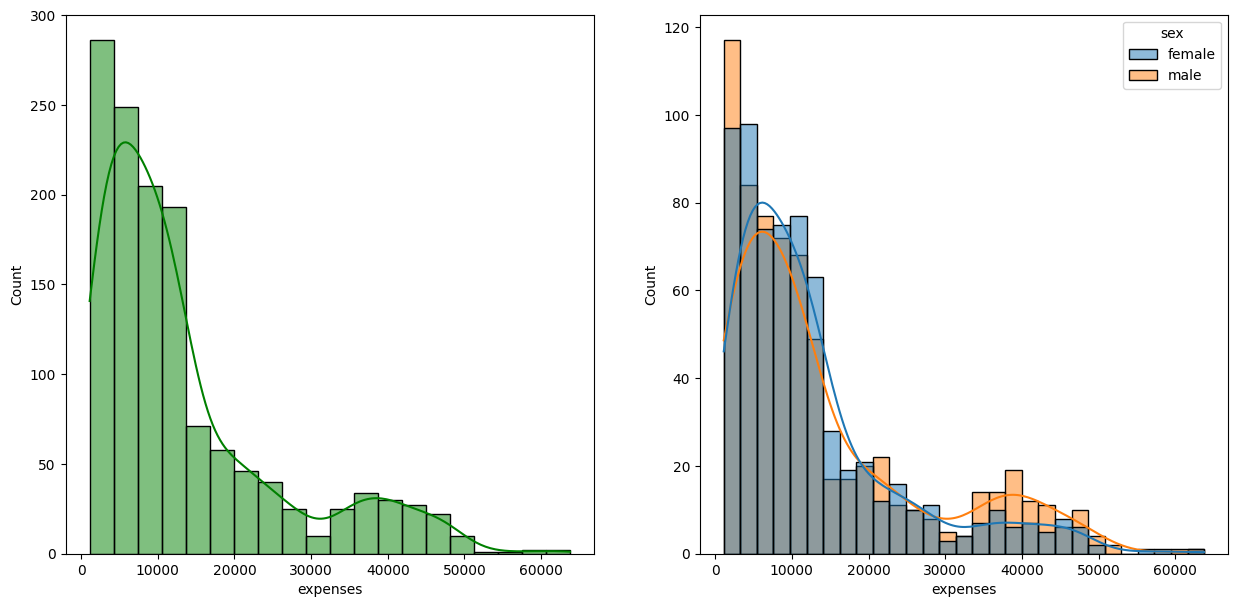

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='expenses', bins=20, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='expenses', kde=True, hue='sex')
plt.show()

**Insights**
- In case of rich candidates, male spend slightly more than females.

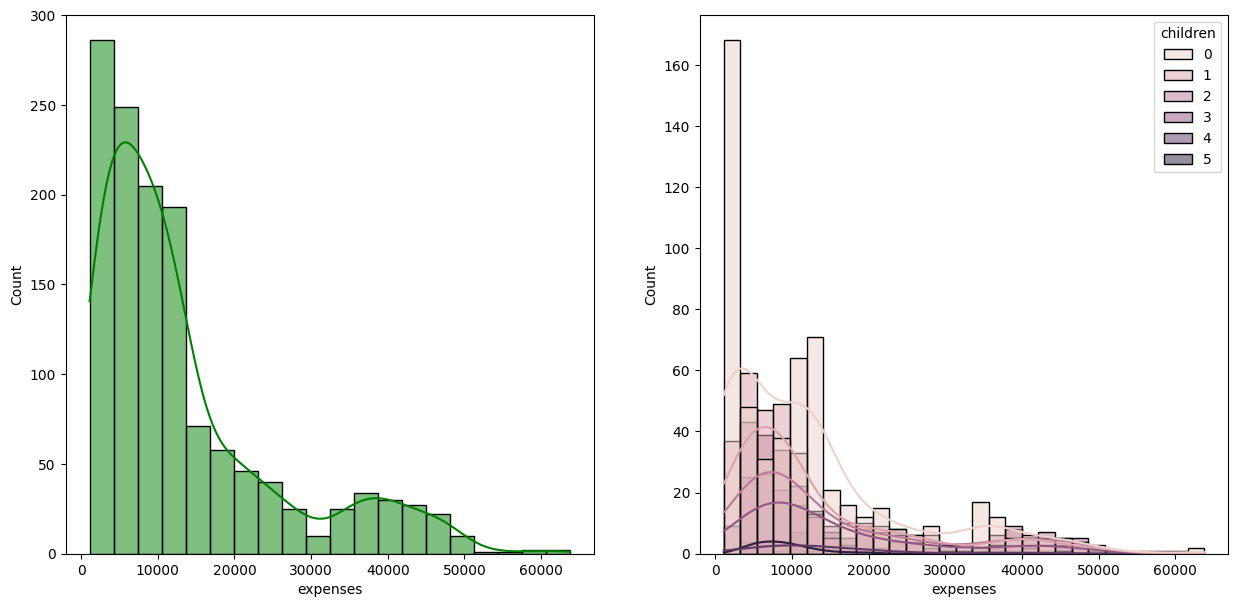

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='expenses', bins=20, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='expenses', kde=True, hue='children')
plt.show()

**Insights**
- Candidates with low to medium range expense are more likely to not have any children.
- Candidates with 5 children also more likely to have low to medium range expense. 

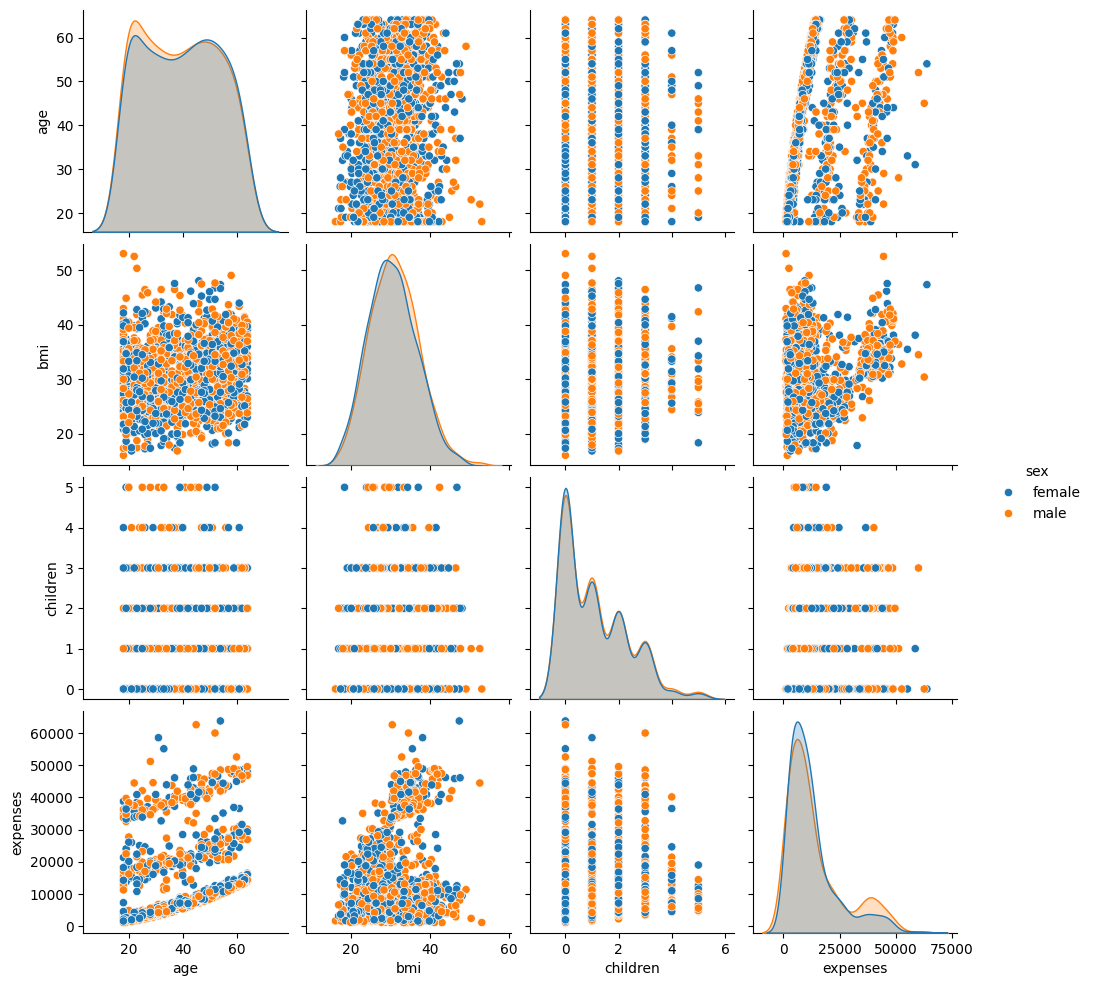

In [17]:
sns.pairplot(df,hue = 'sex')
plt.show()

**Insights**
- For all the numerical features, there isn't any high bias with respect to gender.

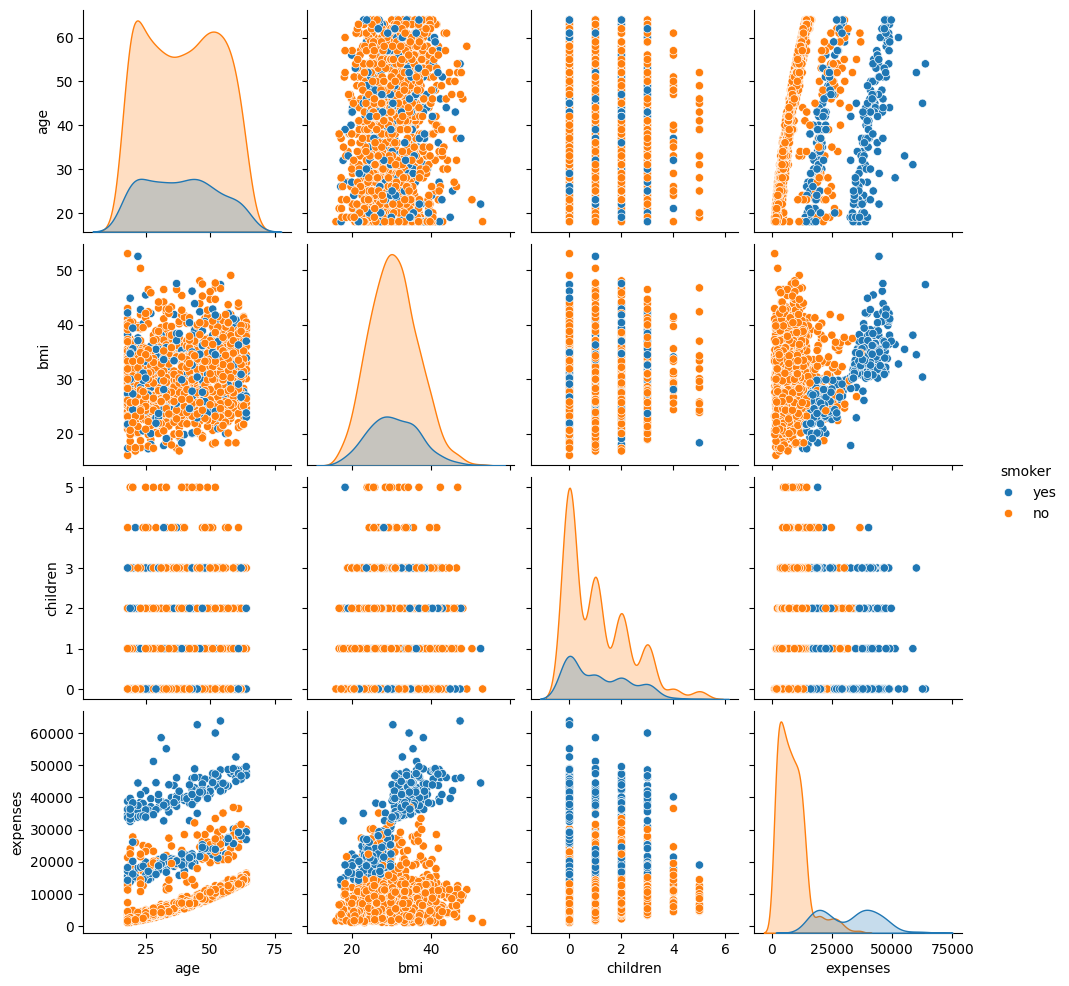

In [18]:
sns.pairplot(df,hue = 'smoker')
plt.show()

**Insights**
- Again, smoker tends to spend more